# Multiobjective optimization

The goal of this example to show, how we can use Artap to solve a simple,
bi-objective optimization problem.

The problem is defined in the following way [[1]](#1):

Minimize $f_1 = x_1$.

Minimize $f_2 = (1+x_2) / x_1$.

subject to
        $$
        x_1 \in \langle 0.1, 1 \rangle,
        $$
        $$
        x_2 \in  \langle 0, 5 \rangle.
        $$

The Pareto - front of the following problem is known, it is a simple
hyperbola. This problem is very simple for an Evolutionary algorithm, it finds its solution within 20-30 generations.
NSGA - II algorithm is used to solve this example.

In [16]:
from artap.problem import Problem
from artap.algorithm_genetic import NSGAII
from artap.results import Results

In [17]:
class BiObjectiveProblem(Problem):
    def set(self):
        # Not mandatory to give a name for the test problem
        self.name = 'Biobjective Problem'
        self.working_dir = '.'
        # Defines x_1 and x_2, which are the optimized parameters
        # and the bounds 'defines' the constraints of the optimization problem
        # nsga -- ii algorithm doesn't need an initial value for the definition
        self.parameters = [{'name': 'x_1', 'bounds': [0.1, 1.]},
                           {'name': 'x_2', 'bounds': [0.0, 5.0]}]

        # The two, separate optimization functions and the direction of the optimization
        # is set to minimization. It is also possible to use the maximize keyword.
        self.costs = [{'name': 'f_1', 'criteria': 'minimize'},
                      {'name': 'f_2', 'criteria': 'minimize'}]

    def evaluate(self, individual):
        # The individual.vector function contains the problem parameters in the appropriate (previously defined) order
        f1 = individual.vector[0]
        f2 = (1 + individual.vector[1]) / individual.vector[0]
        # individual.auxvar = [1.]
        return [f1, f2]

In [27]:
# Initialization of the problem
problem = BiObjectiveProblem()

# Perform the optimization iterating over 100 times on 100 individuals.
algorithm = NSGAII(problem)
algorithm.options['max_population_number'] = 100
algorithm.options['max_population_size'] = 100
algorithm.run()

2022-02-03 08:52:36,492 (INFO): BiObjectiveProblem-480894 - run (146) - NSGA_II: 100/10000
2022-02-03 08:52:41,145 (INFO): BiObjectiveProblem-480894 - run (173) - NSGA_II: elapsed time: 4.653043746948242 s


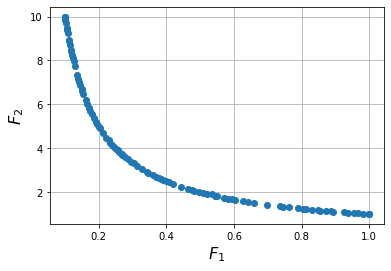

In [ ]:
# Post - processing the results
# reads in the result values into the b, results class
import pylab as plt
results = Results(problem)
table = results.pareto_front()
plt.plot(table[0], table[1], 'o')
plt.grid()
plt.xlabel(r'$F_1$', fontsize=16)
plt.ylabel(r'$F_2$', fontsize=16)
plt.show()

---
It is possible to plot Pareto front for arbitrary generation

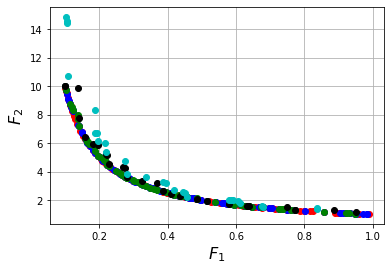

In [29]:
import pylab as plt
results = Results(problem)
colors = ['ro', 'bo', 'go', 'ko', 'co'] 
for i in range(5):
    table = results.pareto_front(population_id=10-2*i)
    plt.plot(table[0], table[1], colors[i])

plt.grid()
plt.xlabel(r'$F_1$', fontsize=16)
plt.ylabel(r'$F_2$', fontsize=16)
plt.show()

---
Measure the quality of the solution with the aid of the built-in performace metrics
We have to define a solution, which is a list of the [x, 1/x] tuples in the given area.
The reference function can be defined by the following list comprehension:

In [12]:
reference = [(0.1 + x * 4.9 / 1000, 1. / (0.1 + x * 4.9 / 1000)) for x in range(0, 1000)]
print('Additive unary epsilon indicator:', results.performance_measure(reference))
print('Generational distance:', results.performance_measure(reference, type='gd'))

Additive unary epsilon indicator: 0.7998040153002501
Generational distance: 0.025828496811531876


##  References


<a id="1">[1]</a>  Kukkonen and J. Lampinen, "GDE3: the third evolution step of generalized differential evolution," 2005 IEEE Congress on Evolutionary Computation, 2005, pp. 443-450 Vol.1, doi: 10.1109/CEC.2005.1554717.